In [29]:
import quandl
import sklearn as skl
import datetime
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# used with Quandl, but switched to Yahoo! finance, so this cell is obsolete

today = datetime.date.today()
user_key = 'LTC_USD' # change to user input
key = 'GDAX/' + user_key
api_key = '6zmz3-K4G_qsUzoybQQN'
coin = quandl.get(key, start_date=today-datetime.timedelta(weeks=26), end_date=today, authtoken=api_key)

In [30]:
# importing Disney stock history, Jan. 4, 2010 to July 13, 2020
dis = pd.read_csv('dis.csv')
dis['Date'] = dis['Date'].astype('datetime64[D]')
dis

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,32.500000,32.750000,31.870001,32.070000,27.933924,13700400
1,2010-01-05,32.070000,32.160000,31.700001,31.990000,27.864237,10307700
2,2010-01-06,31.900000,32.000000,31.680000,31.820000,27.716166,10709500
3,2010-01-07,31.770000,31.860001,31.540001,31.830000,27.724878,8202100
4,2010-01-08,31.660000,31.940001,31.530001,31.879999,27.768419,7657500
...,...,...,...,...,...,...,...
2644,2020-07-07,113.629997,115.080002,112.610001,113.629997,113.629997,10836500
2645,2020-07-08,113.480003,117.129997,112.809998,116.660004,116.660004,13629500
2646,2020-07-09,116.510002,117.849998,115.379997,116.809998,116.809998,13582900
2647,2020-07-10,116.830002,119.440002,116.209999,119.339996,119.339996,14207900


In [36]:
# compiling Disney releases, including Marvel Studios
releases = pd.DataFrame()
decades = ['2010','2020']
for d in decades:
    releases_dec = pd.read_csv(f'disney_{d}.csv',names=['Type','Title','US_Release','Production_Companies'],header=0,
                              usecols=['Title','US_Release','Production_Companies'])
    releases = pd.concat([releases,releases_dec],ignore_index=True)
marvel = pd.read_csv('marvel.csv',names=['Title','US_Release','Production_Companies'],header=0)
releases = pd.concat([releases,marvel],ignore_index=True)
# print(releases.US_Release[0])
# datetime.datetime.strptime(releases.US_Release,'%d-%b-%y')
releases['US_Release'] = releases['US_Release'].astype('datetime64[D]')
releases.sort_values('US_Release',inplace=True,ignore_index=True)
releases

,Title,US_Release,Production_Companies
0,Alice in Wonderland,2010-03-05,"The Zanuck Company, Roth Films and Team Todd"
1,Waking Sleeping Beauty,2010-03-26,Stone Circle Pictures
2,Oceans,2010-04-22,"Participant Media, Pathé, Gatetee Films, Canal..."
3,Iron Man 2,2010-05-07,Marvel Studios
4,Prince of Persia: The Sands of Time,2010-05-28,Jerry Bruckheimer Films
...,...,...,...
113,Stargirl,2020-03-13,Gotham Group and Hahnscape Entertainment
114,Elephant,2020-04-03,Disneynature
115,Dolphin Reef,2020-04-03,Disneynature
116,Artemis Fowl,2020-06-12,TriBeCa Productions and Marzano Films


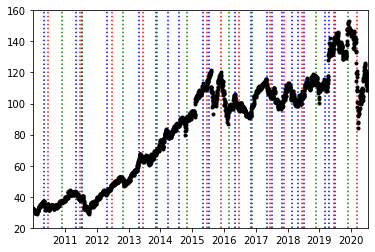

In [46]:
# plotting Disney stock price over the past decade, with vertical lines representing "major" Disney releases
# (Disney, Pixar, Marvel)
plt.plot(dis.Date,dis.Open,'k.')
plt.vlines(releases.loc[releases.Production_Companies=='Marvel Studios'].US_Release,20,160,linestyles='dotted',colors='b')
plt.vlines(releases.loc[releases.Production_Companies=='Pixar Animation Studios'].US_Release,20,160,
           linestyles='dotted',colors='r')
plt.vlines(releases.loc[releases.Production_Companies=='Walt Disney Animation Studios'].US_Release,20,160,
           linestyles='dotted',colors='g')
plt.axis([dis.Date.min(),dis.Date.max(),20,160])
plt.show()

In [84]:
# calculating days until/since major Disney release. differentiate between the two later
def nearest(items, target):
    return min(items, key = lambda x: abs(x-target))
dis['Disneyless_Days'] = [abs(nearest(releases.US_Release,date) - date) for date in dis.Date]

In [85]:
dis

,Date,Open,High,Low,Close,Adj Close,Volume,Disneyless_Days
0,2010-01-04,32.500000,32.750000,31.870001,32.070000,27.933924,13700400,60 days
1,2010-01-05,32.070000,32.160000,31.700001,31.990000,27.864237,10307700,59 days
2,2010-01-06,31.900000,32.000000,31.680000,31.820000,27.716166,10709500,58 days
3,2010-01-07,31.770000,31.860001,31.540001,31.830000,27.724878,8202100,57 days
4,2010-01-08,31.660000,31.940001,31.530001,31.879999,27.768419,7657500,56 days
...,...,...,...,...,...,...,...,...
2644,2020-07-07,113.629997,115.080002,112.610001,113.629997,113.629997,10836500,4 days
2645,2020-07-08,113.480003,117.129997,112.809998,116.660004,116.660004,13629500,5 days
2646,2020-07-09,116.510002,117.849998,115.379997,116.809998,116.809998,13582900,6 days
2647,2020-07-10,116.830002,119.440002,116.209999,119.339996,119.339996,14207900,7 days
